# Classify common images

In this activity, you'll train models to associate images representing common objects with their class.

The [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. The classes are completely mutually exclusive. There are 50,000 training images and 10,000 test images.

![CIFAR10 images](images/cifar10.png)

## Package setup

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Setup plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
# Import ML packages (edit this list if needed)
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

TensorFlow version: 2.0.0
Keras version: 2.2.4-tf


## Utility functions

In [4]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['accuracy']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

## Step 1: Loading the data

### Question

* Load the CIFAR10 dataset included with Keras.
* Display the first 30 test images.

In [5]:
# Load the data

# BEGIN SOLUTION CODE
# Load the Keras CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(f'Training images: {train_images.shape}. Training labels: {train_labels.shape}')
print(f'Training labels: {train_labels}')
# END SOLUTION CODE

Training images: (50000, 32, 32, 3). Training labels: (50000, 1)
Training labels: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


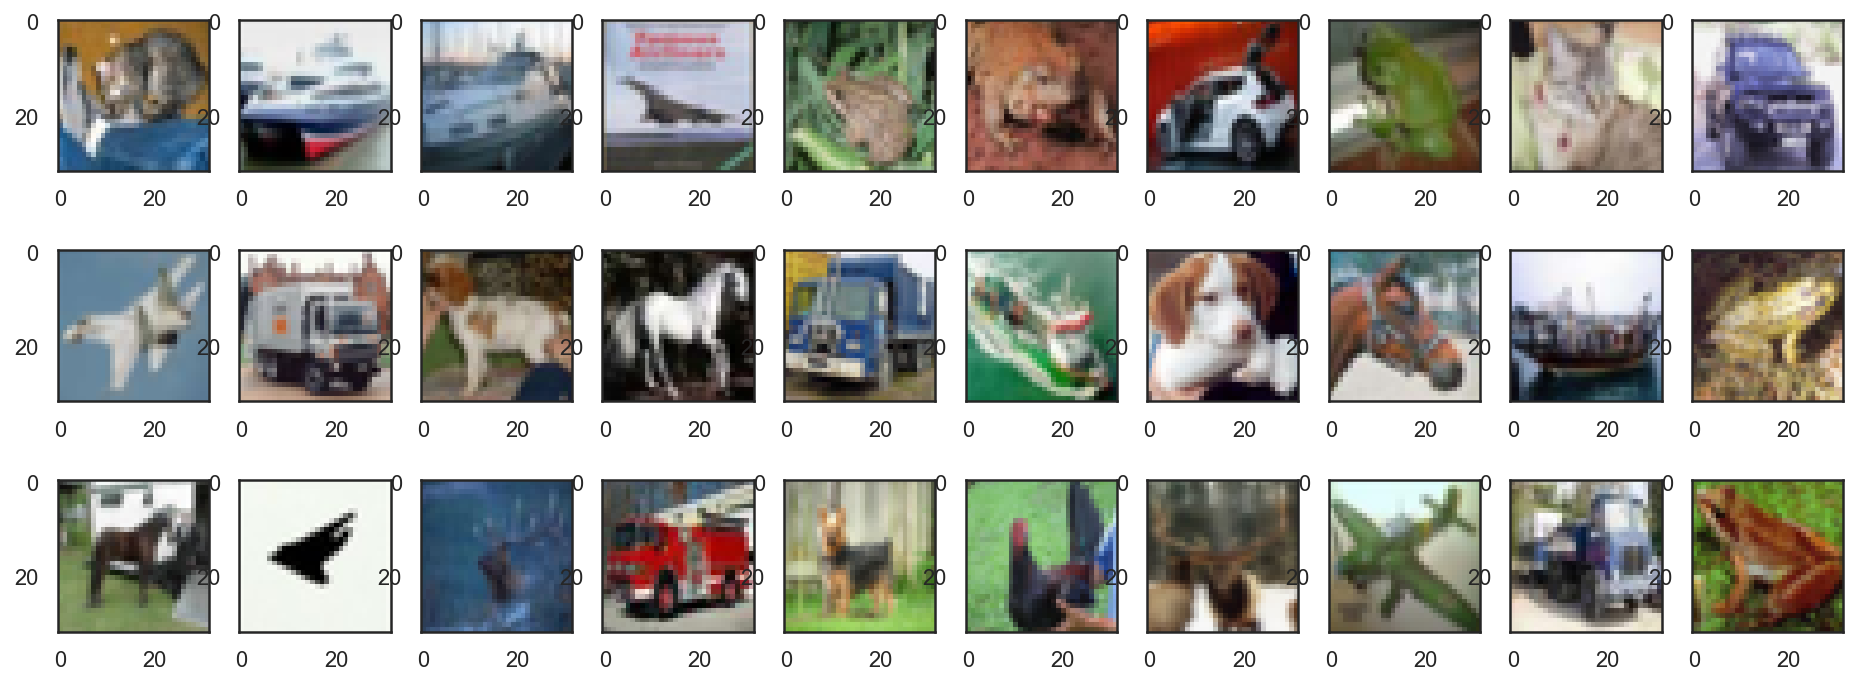

In [6]:
# Plot the first 30 images

# BEGIN SOLUTION CODE
# Temporary hide Seaborn grid lines
with sns.axes_style('white'):
    plt.figure(figsize=(16, 6))
    for i in range(30):
        image = test_images[i]
        fig = plt.subplot(3, 10, i + 1)
        plt.imshow(image, cmap=plt.cm.binary)
# END SOLUTION CODE

## Step 2: Training a dense neural network

### Question

* Prepare data for training with a dense network.
* Train a model on the data to obtain the expected validation accuracy. Use 20% of the training set for validation. Store the training history in a variable named `history`.

In [7]:
# Prepare data for training

# BEGIN SOLUTION CODE
# Change pixel values from (0, 255) to (0, 1)
x_train = train_images.astype('float32') / 255
x_test = test_images.astype('float32') / 255

# Convert targets from vectors to binary matrixes
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
# END SOLUTION CODE

In [8]:
# Create and train a model

# BEGIN SOLUTION CODE
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Train the model and show results
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20, batch_size=128,
                    validation_split=0.2)
# END SOLUTION CODE

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 9s 232us/sample - loss: 2.5376 - accuracy: 0.2307 - val_loss: 2.1010 - val_accuracy: 0.2355
Epoch 2/20
40000/40000 [==============================] - 9s 213us/sample - loss: 1.8665 - accuracy: 0.3288 - val_loss: 1.8704 - val_accuracy: 0.3346
Epoch 3/20
40000/40000 [==============================] - 8s 211us/sample - loss: 1.7590 - accuracy: 0.3729 - val_loss: 1.8306 - val_accuracy: 0.3379
Epoch 4/20
40000/40000 [==============================] - 8s 210us/sample - loss: 1.6913 - accuracy: 0.3985 - val_loss: 1.7334 - val_accuracy: 0.3799
Epoch 5/20
40000/40000 [==============================] - 9s 213us/sample - loss: 1.6451 - accuracy: 0.4165 - val_loss: 1.7008 - val_accuracy: 0.3994
Epoch 6/20
40000/40000 [==============================] - 9s 226us/sample - loss: 1.6076 - accuracy: 0.4307 - val_loss: 1.8141 - val_accuracy: 0.3579
Epoch 7/20
40000/40000 [==========================

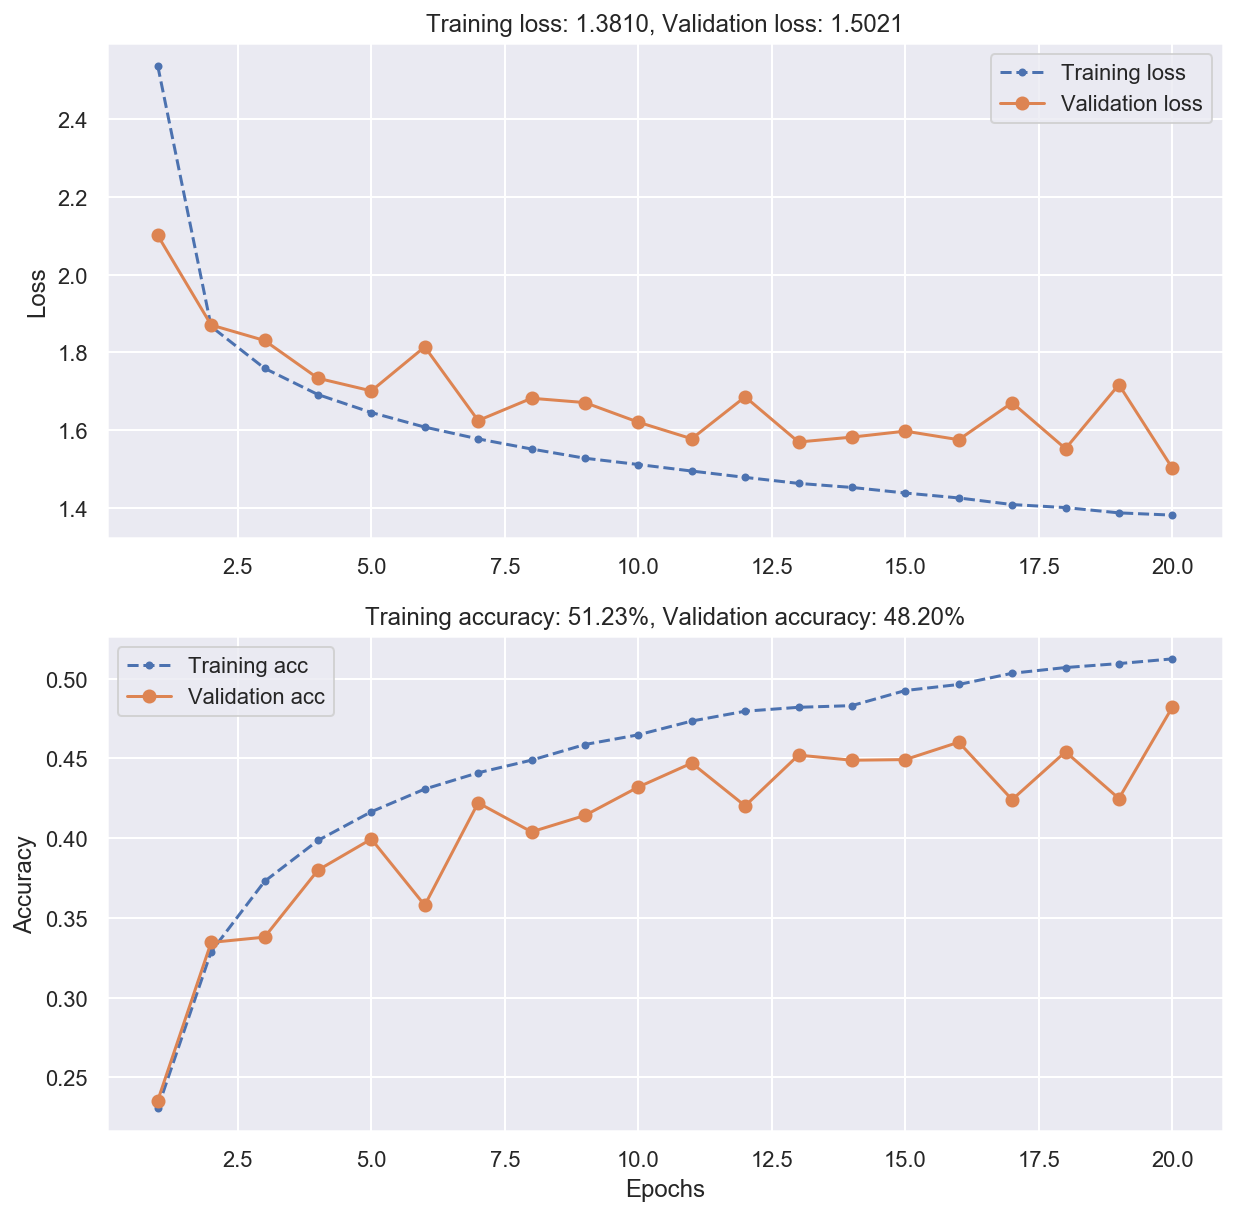

In [9]:
# Plot training history
plot_loss_acc(history)

In [10]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final accuracy
assert val_acc > 0.45

In [11]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 48.17%


## Step 3: Training a convnet

### Question

Train a model on the data to obtain the expected validation accuracy. Store the training history in a variable named `history`.

In [12]:
# Create a convnet

# BEGIN SOLUTION CODE
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
# END SOLUTION CODE

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [13]:
# Train the convnet

# BEGIN SOLUTION CODE
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    epochs=20, batch_size=32,
                    validation_split=0.2)
# END SOLUTION CODE

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.5602 - accuracy: 0.4320 - val_loss: 1.3293 - val_accuracy: 0.5286
Epoch 2/20
40000/40000 [==============================] - 41s 1ms/sample - loss: 1.1853 - accuracy: 0.5787 - val_loss: 1.0815 - val_accuracy: 0.6208
Epoch 3/20
40000/40000 [==============================] - 42s 1ms/sample - loss: 1.0190 - accuracy: 0.6408 - val_loss: 1.0745 - val_accuracy: 0.6286
Epoch 4/20
40000/40000 [==============================] - 42s 1ms/sample - loss: 0.9076 - accuracy: 0.6795 - val_loss: 0.9601 - val_accuracy: 0.6617
Epoch 5/20
40000/40000 [==============================] - 42s 1ms/sample - loss: 0.8264 - accuracy: 0.7132 - val_loss: 0.9263 - val_accuracy: 0.6886
Epoch 6/20
40000/40000 [==============================] - 42s 1ms/sample - loss: 0.7644 - accuracy: 0.7380 - val_loss: 0.9503 - val_accuracy: 0.7021
Epoch 7/20
40000/40000 [==============================] 

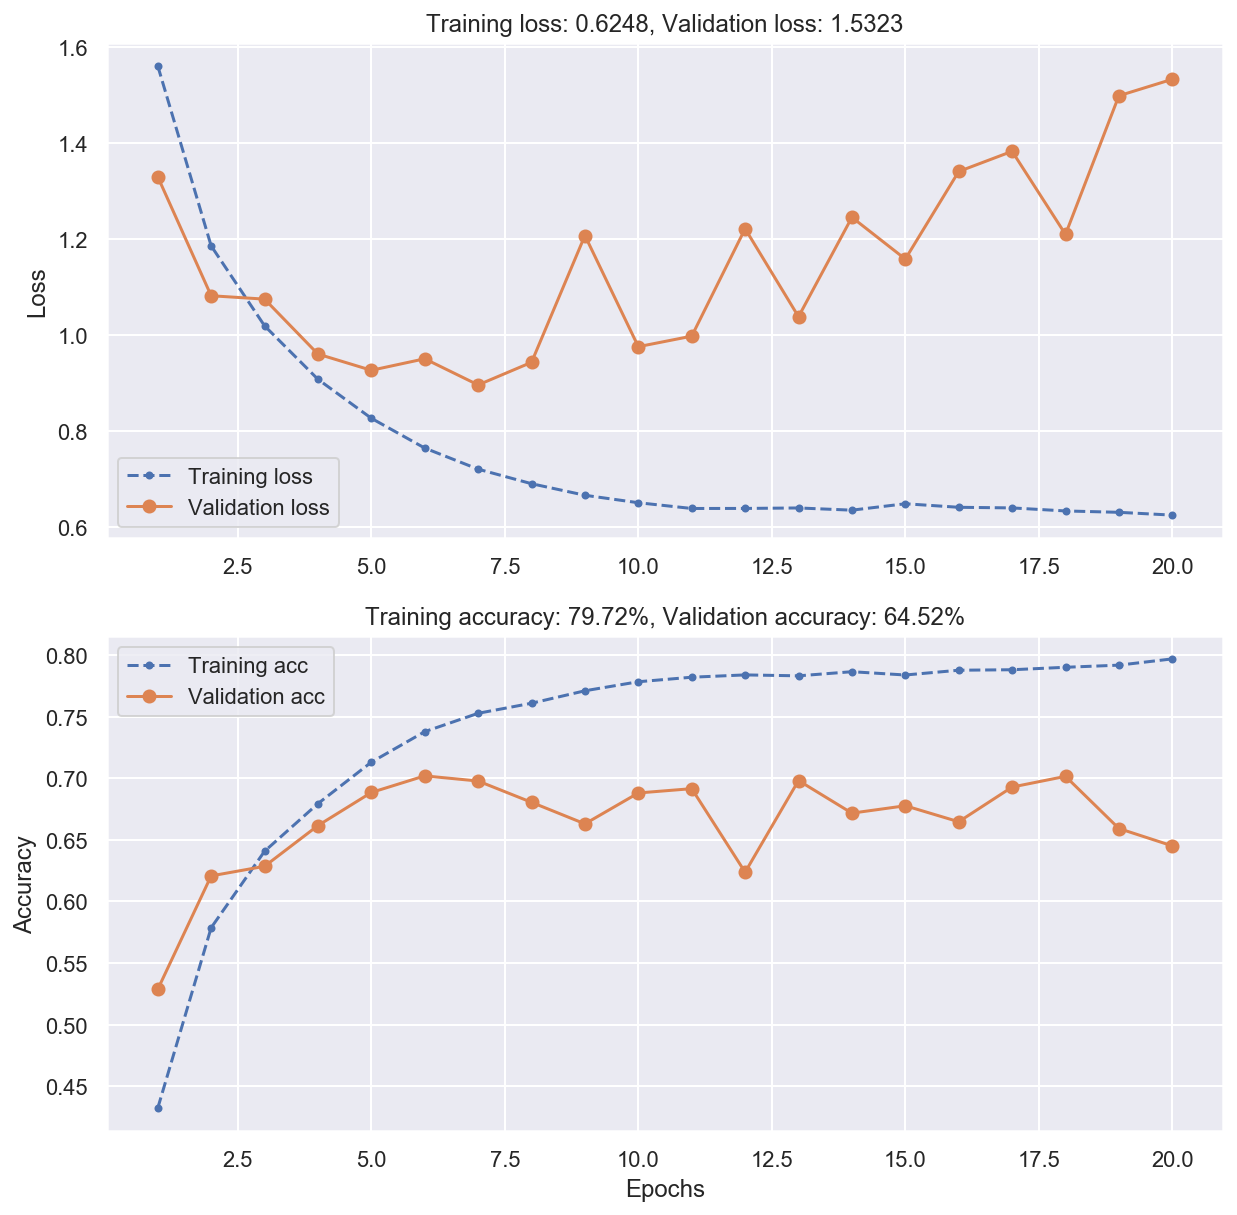

In [14]:
# Plot training history
plot_loss_acc(history)

In [15]:
# Retrieve final validation accuracy
val_acc = history.history['val_accuracy'][-1]

# Assert final validation accuracy
assert val_acc > 0.66

AssertionError: 

In [16]:
# Evaluate model performance on test data
_, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 64.12%
